In [5]:
from datascience import * 
import numpy as np 
import matplotlib.pyplot as plots 
plots.style.use('fivethirtyeight') 
%matplotlib inline 

table = Table.read_table('educ_inc.csv')
table

Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
1/1/08 0:00,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
1/1/08 0:00,00 to 17,Male,No high school diploma,"F: 35,000 to 49,999",2227
1/1/08 0:00,00 to 17,Male,No high school diploma,"E: 25,000 to 34,999",2606
1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","D: 15,000 to 24,999",3465
1/1/08 0:00,00 to 17,Male,No high school diploma,"D: 15,000 to 24,999",3974
1/1/08 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",4233


In [6]:
year = table.group(['Year'])
age = table.group(['Age'])
gen = table.group(2)
ea = table.group(3)
pi = table.group(4)
pc = table.group(5)

year

Year,count
1/1/08 0:00,145
1/1/09 0:00,149
1/1/10 0:00,147
1/1/11 0:00,151
1/1/12 0:00,145
1/1/13 0:00,144
1/1/14 0:00,145


In [7]:
age

Age,count
00 to 17,134
18 to 64,448
65 to 80+,444


In [8]:
gen

Gender,count
Female,513
Male,513


In [9]:
ea

Educational Attainment,count
Bachelor's degree or higher,231
"College, less than 4-yr degree",258
High school or equivalent,250
No high school diploma,287


In [10]:
pi

Personal Income,count
"A: 0 to 4,999",143
"B: 5,000 to 9,999",141
"C: 10,000 to 14,999",138
"D: 15,000 to 24,999",137
"E: 25,000 to 34,999",122
"F: 35,000 to 49,999",118
"G: 50,000 to 74,999",115
"H: 75,000 and over",112


In [11]:
pc

Population Count,count
1048,1
1104,1
1117,1
1185,1
1192,1
1198,2
1209,1
1283,1
1294,1
1304,1


In [21]:
t = table.group("Year",sum).drop(1,2,3,4)
t

Year,Population Count sum
1/1/08 0:00,26532250
1/1/09 0:00,26442817
1/1/10 0:00,26469031
1/1/11 0:00,27160088
1/1/12 0:00,27641508
1/1/13 0:00,27905466
1/1/14 0:00,28215807


In [13]:
table.group(['Year','Age'])

Year,Age,count
1/1/08 0:00,00 to 17,17
1/1/08 0:00,18 to 64,64
1/1/08 0:00,65 to 80+,64
1/1/09 0:00,00 to 17,21
1/1/09 0:00,18 to 64,64
1/1/09 0:00,65 to 80+,64
1/1/10 0:00,00 to 17,19
1/1/10 0:00,18 to 64,64
1/1/10 0:00,65 to 80+,64
1/1/11 0:00,00 to 17,23


In [14]:
table.pivot('Year','Age')

Age,1/1/08 0:00,1/1/09 0:00,1/1/10 0:00,1/1/11 0:00,1/1/12 0:00,1/1/13 0:00,1/1/14 0:00
00 to 17,17,21,19,23,19,17,18
18 to 64,64,64,64,64,64,64,64
65 to 80+,64,64,64,64,62,63,63


In [15]:
table1 = Table().with_columns('a', make_array(9,3,3,1),
                             'b',make_array(1,2,2,10),
                             'c',make_array(3,4,5,6))
print(table1)
print()

table2 = Table().with_columns('a', make_array(9,1,1,1),
                             'd', make_array(1,2,2,10),
                             'e',make_array(3,4,5,6))
print(table2)

table3 = table1.join('a',table2,'a')
table3

a    | b    | c
9    | 1    | 3
3    | 2    | 4
3    | 2    | 5
1    | 10   | 6

a    | d    | e
9    | 1    | 3
1    | 2    | 4
1    | 2    | 5
1    | 10   | 6


a,b,c,d,e
1,10,6,2,4
1,10,6,2,5
1,10,6,10,6
9,1,3,1,3


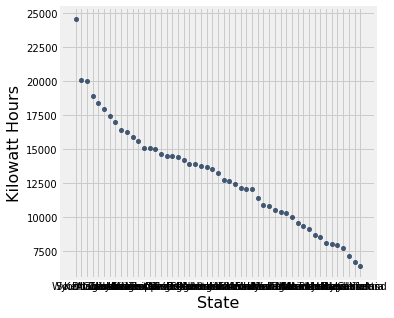

In [16]:
e = Table.read_table('energy.csv')
e.scatter(0)

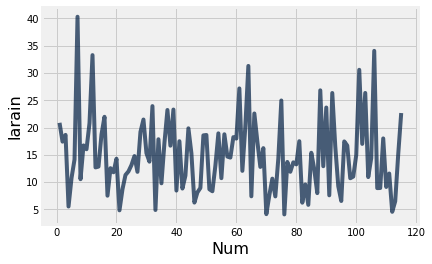

In [17]:
la = Table.read_table('larain.csv')
la.plot(0)

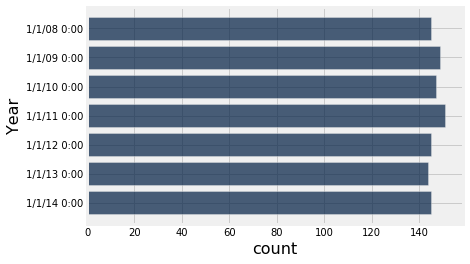

In [18]:
year.barh(0)

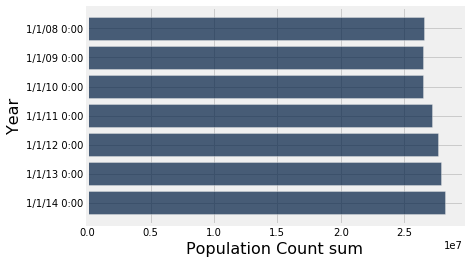

In [22]:
t.barh(0)